In [ ]:
#Importing Modules
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading Data
%cd /content/drive/My Drive
df = pd.read_csv('train.csv')

/content/drive/My Drive


In [ ]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
from tensorflow.keras.layers import TextVectorization

In [ ]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [ ]:
MAX_FEATURES = 200000  #number of words in the vocab

In [ ]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES, output_sequence_length=1800, output_mode='int')

In [ ]:
vectorizer.adapt(X.values)

In [ ]:
# vectorizer.get_vocabulary()

In [ ]:
vectorizer_text = vectorizer(X.values)

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((vectorizer_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [ ]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [ ]:
train = dataset.take(int(len(dataset)*0.7))
val = dataset.skip(int(len(dataset)*0.7)).take(int(len(dataset)*0.2))
test = dataset.skip(int(len(dataset)*0.9)).take(int(len(dataset)*0.1))

In [ ]:
train_generater = train.as_numpy_iterator()

In [ ]:
train_generater.next()

(array([[    40,     62,   1395, ...,      0,      0,      0],
        [    33,      7,    130, ...,      0,      0,      0],
        [     2,    113,    257, ...,      0,      0,      0],
        ...,
        [   104, 128420,      5, ...,      0,      0,      0],
        [     7,     45,     28, ...,      0,      0,      0],
        [   231,      2,   1108, ...,      0,      0,      0]]),
 array([[1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [ ]:
model = Sequential()
#creating the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
#Bidirectional LSTM layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
#Feature extractor Fully Connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
#Final Layer
model.add(Dense(6, activation='sigmoid'))

In [ ]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [ ]:
model.build(input_shape=(None, None))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [ ]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
6981/6981 [==============================] - 875s 124ms/step - loss: 0.0632 - val_loss: 0.0448
Epoch 2/10
6981/6981 [==============================] - 744s 107ms/step - loss: 0.0466 - val_loss: 0.0402
Epoch 3/10
6981/6981 [==============================] - 834s 119ms/step - loss: 0.0410 - val_loss: 0.0358
Epoch 4/10
6981/6981 [==============================] - 1079s 155ms/step - loss: 0.0369 - val_loss: 0.0325
Epoch 5/10
6981/6981 [==============================] - 896s 128ms/step - loss: 0.0340 - val_loss: 0.0306
Epoch 6/10
6981/6981 [==============================] - 759s 109ms/step - loss: 0.0307 - val_loss: 0.0266
Epoch 7/10
6981/6981 [==============================] - 750s 107ms/step - loss: 0.0275 - val_loss: 0.0251
Epoch 8/10
6981/6981 [==============================] - 756s 108ms/step - loss: 0.0249 - val_loss: 0.0233
Epoch 9/10
6981/6981 [==============================] - 751s 108ms/step - loss: 0.0224 - val_loss: 0.0182
Epoch 10/10
6981/6981 [======================

In [ ]:
history.history

{'loss': [0.06319045275449753,
  0.04662182927131653,
  0.04101138934493065,
  0.036925941705703735,
  0.034022532403469086,
  0.030656414106488228,
  0.027521340176463127,
  0.024851497262716293,
  0.022417139261960983,
  0.020162289962172508],
 'val_loss': [0.044786304235458374,
  0.04020040109753609,
  0.03577040880918503,
  0.032545268535614014,
  0.03063877485692501,
  0.026551837101578712,
  0.025078652426600456,
  0.02332945726811886,
  0.01821283809840679,
  0.016908133402466774]}

In [ ]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

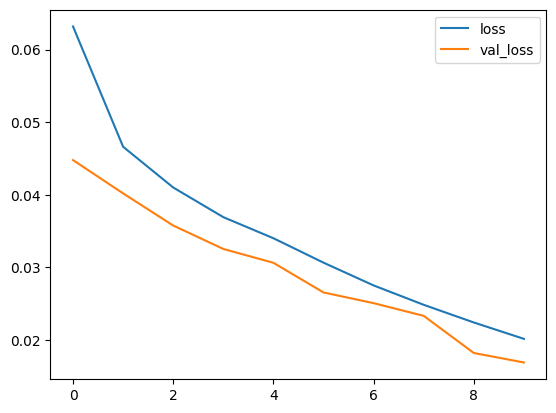

In [ ]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

## Make Predictions

In [ ]:
input_text = vectorizer("I will kill you")

In [ ]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [ ]:
batch = test.as_numpy_iterator().next()

In [ ]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [ ]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 1s 896ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [ ]:
res = model.predict(np.expand_dims(input_text, 0))

1/1 [==============================] - 0s 130ms/step


# Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()


In [ ]:
for batch in test.as_numpy_iterator():
  X_true, y_true = batch

  yhat = model.predict(X_true)

  y_true = y_true.flatten()
  yhat = yhat.flatten()

  pre.update_state(y_true, yhat)
  re.update_state(y_true, yhat)
  acc.update_state(y_true,  yhat)


1/1 [==============================] - 0s 52ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

# Testing and Gradio

In [ ]:
!pip install gradio jinja2

In [ ]:
import tensorflow as tf
import gradio as gr

In [ ]:
model.save('toxicityh5')

In [ ]:
# model = tf.keras.models.load_model('toxicity.h5')

In [ ]:
input_str = vectorizer('Hey I love you')

In [ ]:
res = model.predict(np.expand_dims(input_str, 0))

In [ ]:
def score_comment(comment):
  vectorized_comment = vectorizer([comment])
  results = model.predict(vectorized_comment)

  text = ''
  for idx, col in enumerate(df.columns[2:]):
    text += '{}: {}\n'.format(col, results[0][idx]>0.5)
  return text

In [ ]:
interface = gr.Interface(fn=score_comment, inputs=gr.Textbox(lines=2, placeholder='Comment to score'), outputs=gr.Textbox())
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://36484dd9dc8b3c1a33.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
